In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from PreprocessingFunctions import missing_values

In [3]:
train=pd.read_excel("flight_prediction/Data_Train.xlsx")
test=pd.read_excel("flight_prediction/Test_Set.xlsx")

In [4]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [7]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
train.duplicated().sum()

220

In [9]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
train.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [11]:
train.Date_of_Journey.nunique()

44

In [12]:
#data seperating with slash   this is feature split

train['Date']=train.Date_of_Journey.str.split("/").str[0]      #veruthe 0 koduthal kittilla

In [13]:
train['Month']=train.Date_of_Journey.str.split("/").str[1]
train['Year']=train.Date_of_Journey.str.split("/").str[2]

In [14]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  object
 12  Month            10683 non-null  object
 13  Year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [16]:
train['Date']=train['Date'].astype(int)
train['Month']=train['Month'].astype(int)
train['Year']=train['Year'].astype(int)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int32 
 12  Month            10683 non-null  int32 
 13  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


In [18]:
train.drop(['Date_of_Journey'],axis=1,inplace=True)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int32 
 11  Month            10683 non-null  int32 
 12  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(9)
memory usage: 959.9+ KB


In [20]:
# feature split in dep_time
train.Dep_Time.unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [21]:
train["dep_hour"]=train.Dep_Time.str.split(":").str[0]
train["dep_min"]=train.Dep_Time.str.split(":").str[1]




In [22]:
train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int32 
 11  Month            10683 non-null  int32 
 12  Year             10683 non-null  int32 
 13  dep_hour         10683 non-null  object
 14  dep_min          10683 non-null  object
dtypes: int32(3), int64(1), object(11)
memory usage: 1.1+ MB


In [24]:
# changing datatype

train['dep_hour']=train['dep_hour'].astype(int)
train['dep_min']=train['dep_min'].astype(int)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int32 
 11  Month            10683 non-null  int32 
 12  Year             10683 non-null  int32 
 13  dep_hour         10683 non-null  int32 
 14  dep_min          10683 non-null  int32 
dtypes: int32(5), int64(1), object(9)
memory usage: 1.0+ MB


In [26]:
train.drop(['Dep_Time'],axis=1,inplace=True)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int32 
 10  Month            10683 non-null  int32 
 11  Year             10683 non-null  int32 
 12  dep_hour         10683 non-null  int32 
 13  dep_min          10683 non-null  int32 
dtypes: int32(5), int64(1), object(8)
memory usage: 959.9+ KB


In [28]:
train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [29]:
# route thalkalam edukkunnilla

In [30]:
train.Arrival_Time



0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [31]:


train.Arrival_Time=train.Arrival_Time.apply(lambda x : x.split(" ")[0])

In [32]:
train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [33]:
# split it into new colom

train["Arrival_hour"]=train["Arrival_Time"].str.split(":").str[0]
train["Arrival_min"]=train["Arrival_Time"].str.split(":").str[1]

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int32 
 10  Month            10683 non-null  int32 
 11  Year             10683 non-null  int32 
 12  dep_hour         10683 non-null  int32 
 13  dep_min          10683 non-null  int32 
 14  Arrival_hour     10683 non-null  object
 15  Arrival_min      10683 non-null  object
dtypes: int32(5), int64(1), object(10)
memory usage: 1.1+ MB


In [35]:
train["Arrival_hour"]=train["Arrival_hour"].astype(int)
train["Arrival_min"]=train["Arrival_min"].astype(int)

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int32 
 10  Month            10683 non-null  int32 
 11  Year             10683 non-null  int32 
 12  dep_hour         10683 non-null  int32 
 13  dep_min          10683 non-null  int32 
 14  Arrival_hour     10683 non-null  int32 
 15  Arrival_min      10683 non-null  int32 
dtypes: int32(7), int64(1), object(8)
memory usage: 1.0+ MB


In [37]:
train.drop(['Arrival_Time'],axis=1,inplace=True)

In [38]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int32 
 9   Month            10683 non-null  int32 
 10  Year             10683 non-null  int32 
 11  dep_hour         10683 non-null  int32 
 12  dep_min          10683 non-null  int32 
 13  Arrival_hour     10683 non-null  int32 
 14  Arrival_min      10683 non-null  int32 
dtypes: int32(7), int64(1), object(7)
memory usage: 959.9+ KB


In [39]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,dep_hour,dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [40]:
train.Duration.unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [41]:
# ithil nin hours mathram edukkam
train["Duration_hours"]=train.Duration.apply(lambda x: x.split("h")[0])

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int32 
 9   Month            10683 non-null  int32 
 10  Year             10683 non-null  int32 
 11  dep_hour         10683 non-null  int32 
 12  dep_min          10683 non-null  int32 
 13  Arrival_hour     10683 non-null  int32 
 14  Arrival_min      10683 non-null  int32 
 15  Duration_hours   10683 non-null  object
dtypes: int32(7), int64(1), object(8)
memory usage: 1.0+ MB


In [43]:
train.Duration_hours.astype(int)

ValueError: invalid literal for int() with base 10: '5m'

In [44]:
#hour colothil oru min value vannittund so we are finding in which row
train[train["Duration_hours"]=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,dep_hour,dep_min,Arrival_hour,Arrival_min,Duration_hours
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,6,3,2019,16,50,16,55,5m


In [45]:
train.drop(6474,axis=0,inplace=True)

In [46]:
train.Duration_hours=train.Duration_hours.astype(int)

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10681 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10681 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Date             10682 non-null  int32 
 9   Month            10682 non-null  int32 
 10  Year             10682 non-null  int32 
 11  dep_hour         10682 non-null  int32 
 12  dep_min          10682 non-null  int32 
 13  Arrival_hour     10682 non-null  int32 
 14  Arrival_min      10682 non-null  int32 
 15  Duration_hours   10682 non-null  int32 
dtypes: int32(8), int64(1), object(7)
memory usage: 1.1+ MB


In [48]:
train.drop(["Duration"],axis=1,inplace=True)

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10681 non-null  object
 4   Total_Stops      10681 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Date             10682 non-null  int32 
 8   Month            10682 non-null  int32 
 9   Year             10682 non-null  int32 
 10  dep_hour         10682 non-null  int32 
 11  dep_min          10682 non-null  int32 
 12  Arrival_hour     10682 non-null  int32 
 13  Arrival_min      10682 non-null  int32 
 14  Duration_hours   10682 non-null  int32 
dtypes: int32(8), int64(1), object(6)
memory usage: 1001.4+ KB


In [50]:
train.Total_Stops.value_counts()


1 stop      5625
non-stop    3491
2 stops     1519
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [51]:
train.Total_Stops.mode()[0]

'1 stop'

In [52]:
train["Total_Stops"].fillna((train.Total_Stops.mode()[0]),inplace=True)

In [53]:
train["Total_Stops"].isnull().sum()

0

In [54]:
train.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
dep_hour           0
dep_min            0
Arrival_hour       0
Arrival_min        0
Duration_hours     0
dtype: int64

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10681 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Date             10682 non-null  int32 
 8   Month            10682 non-null  int32 
 9   Year             10682 non-null  int32 
 10  dep_hour         10682 non-null  int32 
 11  dep_min          10682 non-null  int32 
 12  Arrival_hour     10682 non-null  int32 
 13  Arrival_min      10682 non-null  int32 
 14  Duration_hours   10682 non-null  int32 
dtypes: int32(8), int64(1), object(6)
memory usage: 1001.4+ KB


In [56]:
# route venda

train.drop(["Route"],axis=1,inplace=True)

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Total_Stops      10682 non-null  object
 4   Additional_Info  10682 non-null  object
 5   Price            10682 non-null  int64 
 6   Date             10682 non-null  int32 
 7   Month            10682 non-null  int32 
 8   Year             10682 non-null  int32 
 9   dep_hour         10682 non-null  int32 
 10  dep_min          10682 non-null  int32 
 11  Arrival_hour     10682 non-null  int32 
 12  Arrival_min      10682 non-null  int32 
 13  Duration_hours   10682 non-null  int32 
dtypes: int32(8), int64(1), object(5)
memory usage: 918.0+ KB


In [58]:
train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,dep_hour,dep_min,Arrival_hour,Arrival_min,Duration_hours
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,2
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,7
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,4,25,19
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,5,23,30,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,50,21,35,4


In [59]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Airline=LabelEncoder()
labelencoder_Source=LabelEncoder()
labelencoder_Destination=LabelEncoder()
labelencoder_Total_Stops=LabelEncoder()
labelencoder_Additionalinfo=LabelEncoder()


In [82]:
train["Airline"]=labelencoder_Airline.fit_transform(train["Airline"])
train["Source"]=labelencoder_Source.fit_transform(train["Source"])
train["Destination"]=labelencoder_Destination.fit_transform(train["Destination"])
train['Total_Stops']=labelencoder_Total_Stops.fit_transform(train["Total_Stops"])
train["Additional_Info"]=labelencoder_Additionalinfo.fit_transform(train["Additional_Info"])

In [83]:
train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,dep_hour,dep_min,Arrival_hour,Arrival_min,Duration_hours
0,3,0,5,4,8,3897.0,24,3,2019,22,20,1,10,2
1,1,3,0,1,8,7662.0,1,5,2019,5,50,13,15,7
2,4,2,1,1,8,13882.0,9,6,2019,9,25,4,25,19
3,3,3,0,0,8,6218.0,12,5,2019,18,5,23,30,5
4,3,0,5,0,8,13302.0,1,3,2019,16,50,21,35,4


In [84]:
## finding outlayers


upper_limit=train["Price"].mean()+3*train["Price"].std()
lower_limit=train["Price"].mean()-3*train["Price"].std()

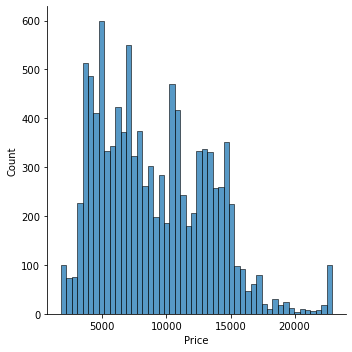

In [85]:
sns.displot(train["Price"],bins=50)

c:\Users\sharo\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

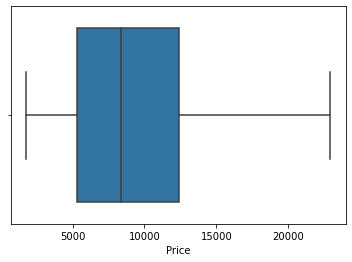

In [118]:
sns.boxplot('Price',data=train)

In [119]:
train[train["Price"] > upper_limit]   # ee 96 rows aan outlayers

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,dep_hour,dep_min,Arrival_hour,Arrival_min,Duration_hours
7,4,0,5,0,8,22270.000000,22,3,2019,8,0,5,5,21
123,1,2,1,0,8,22918.949821,22,3,2019,23,0,19,15,20
396,6,2,1,0,8,22918.949821,22,3,2019,12,50,19,15,6
486,4,0,5,0,8,22918.949821,22,3,2019,8,55,15,15,6
510,4,0,5,0,8,22918.949821,22,3,2019,7,0,12,25,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,4,4,3,1,8,22918.949821,6,3,2019,19,50,16,50,21
10364,5,0,5,0,3,22918.949821,22,3,2019,9,45,14,25,4
10383,4,0,5,0,8,22918.949821,22,3,2019,7,0,5,5,22
10439,4,0,5,0,8,22918.949821,22,3,2019,18,40,9,0,14


In [120]:
train[train["Price"] > upper_limit] 

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,dep_hour,dep_min,Arrival_hour,Arrival_min,Duration_hours
7,4,0,5,0,8,22270.000000,22,3,2019,8,0,5,5,21
123,1,2,1,0,8,22918.949821,22,3,2019,23,0,19,15,20
396,6,2,1,0,8,22918.949821,22,3,2019,12,50,19,15,6
486,4,0,5,0,8,22918.949821,22,3,2019,8,55,15,15,6
510,4,0,5,0,8,22918.949821,22,3,2019,7,0,12,25,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,4,4,3,1,8,22918.949821,6,3,2019,19,50,16,50,21
10364,5,0,5,0,3,22918.949821,22,3,2019,9,45,14,25,4
10383,4,0,5,0,8,22918.949821,22,3,2019,7,0,5,5,22
10439,4,0,5,0,8,22918.949821,22,3,2019,18,40,9,0,14


In [121]:
## missing outliers with percentile

upperlimit=train["Price"].quantile(0.95)
lowerlimit=train["Price"].quantile(0.05)

In [122]:
train[train["Price"] > upperlimit] 

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,dep_hour,dep_min,Arrival_hour,Arrival_min,Duration_hours
7,4,0,5,0,8,22270.0,22,3,2019,8,0,5,5,21
20,2,2,1,0,8,19495.0,6,3,2019,14,10,19,20,5
38,4,0,5,0,8,19225.0,6,3,2019,7,0,13,15,6
56,1,0,5,1,8,17345.0,22,3,2019,8,50,23,55,15
91,6,2,1,0,8,17057.0,6,3,2019,2,15,13,20,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10580,4,0,5,0,8,17261.0,6,3,2019,14,5,9,30,19
10625,4,2,1,1,5,19644.0,9,5,2019,11,40,19,0,7
10645,6,2,1,0,8,17057.0,3,3,2019,7,5,15,30,8
10668,4,2,1,1,8,21219.0,9,5,2019,11,40,19,0,7


In [123]:
# we are going  with first method

train[train["Price"] > upper_limit]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,dep_hour,dep_min,Arrival_hour,Arrival_min,Duration_hours
7,4,0,5,0,8,22270.000000,22,3,2019,8,0,5,5,21
123,1,2,1,0,8,22918.949821,22,3,2019,23,0,19,15,20
396,6,2,1,0,8,22918.949821,22,3,2019,12,50,19,15,6
486,4,0,5,0,8,22918.949821,22,3,2019,8,55,15,15,6
510,4,0,5,0,8,22918.949821,22,3,2019,7,0,12,25,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,4,4,3,1,8,22918.949821,6,3,2019,19,50,16,50,21
10364,5,0,5,0,3,22918.949821,22,3,2019,9,45,14,25,4
10383,4,0,5,0,8,22918.949821,22,3,2019,7,0,5,5,22
10439,4,0,5,0,8,22918.949821,22,3,2019,18,40,9,0,14


In [124]:
# nammal outlayer value mathram edukkan pokunnu
train.loc[train["Price"] > upper_limit]


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,dep_hour,dep_min,Arrival_hour,Arrival_min,Duration_hours
7,4,0,5,0,8,22270.000000,22,3,2019,8,0,5,5,21
123,1,2,1,0,8,22918.949821,22,3,2019,23,0,19,15,20
396,6,2,1,0,8,22918.949821,22,3,2019,12,50,19,15,6
486,4,0,5,0,8,22918.949821,22,3,2019,8,55,15,15,6
510,4,0,5,0,8,22918.949821,22,3,2019,7,0,12,25,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,4,4,3,1,8,22918.949821,6,3,2019,19,50,16,50,21
10364,5,0,5,0,3,22918.949821,22,3,2019,9,45,14,25,4
10383,4,0,5,0,8,22918.949821,22,3,2019,7,0,5,5,22
10439,4,0,5,0,8,22918.949821,22,3,2019,18,40,9,0,14


In [125]:
train.loc[train["Price"] > upper_limit,"Price"]    #loc kodukkunnath price  mathram cut chryyan

7        22270.000000
123      22918.949821
396      22918.949821
486      22918.949821
510      22918.949821
             ...     
10353    22918.949821
10364    22918.949821
10383    22918.949821
10439    22918.949821
10511    22918.949821
Name: Price, Length: 121, dtype: float64

In [126]:
train.loc[train["Price"] > upper_limit,"Price"] = upper_limit

In [ ]:
# function for finding outlayer

def outlayer_treatment(data,columns,method):


    

       

    

IndentationError: expected an indented block (Temp/ipykernel_10972/634776404.py, line 3)

c:\Users\sharo\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

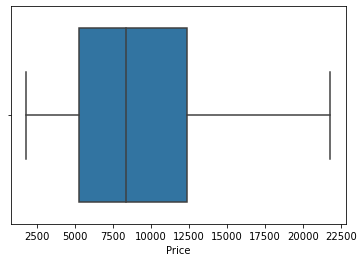

In [127]:
sns.boxplot('Price',data=train)   # out layers mari

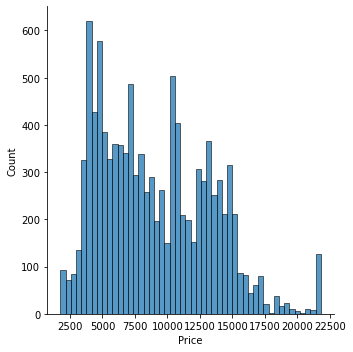

In [128]:
sns.displot(train["Price"],bins=50)

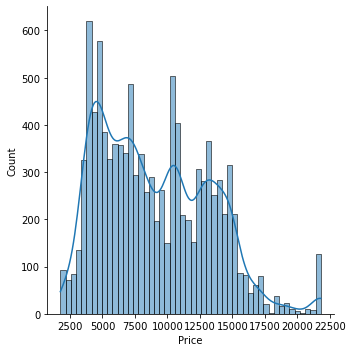

In [129]:
sns.displot(train["Price"],bins=50,kde=True)

In [130]:
upper_limit

21791.150416382436

In [131]:
train.Price.max()    # maximum value upperlimit aayi mari

21791.150416382436

In [132]:
# scaling

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [133]:
new=scaler.fit_transform(train)

In [134]:
new   #this is an array

array([[-0.41080484, -1.65843519,  2.41677843, ..., -1.80031946,
        -0.88998423, -0.97083112],
       [-1.26115217,  0.89029942, -0.97373235, ..., -0.05081299,
        -0.58701691, -0.38223823],
       [ 0.01436882,  0.04072122, -0.29563019, ..., -1.36294284,
         0.01891773,  1.03038468],
       ...,
       [ 0.01436882, -1.65843519,  0.38247196, ..., -0.3423974 ,
        -0.28404959, -0.85311254],
       [ 2.56541078, -1.65843519,  2.41677843, ...,  0.09497921,
        -0.88998423, -0.97083112],
       [-1.26115217,  0.04072122, -0.29563019, ...,  0.82394024,
        -0.58701691, -0.26451966]])

In [135]:
pd.DataFrame(new)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.410805,-1.658435,2.416778,1.407223,0.499921,-1.210910,1.091268,-1.467707,0.0,1.654268,-0.234932,-1.800319,-0.889984,-0.970831
1,-1.261152,0.890299,-0.973732,-0.253644,0.499921,-0.319085,0.830746,0.250153,0.0,-1.303000,1.363674,-0.050813,-0.587017,-0.382238
2,0.014369,0.040721,-0.295630,-0.253644,0.499921,1.154261,-0.862647,1.109082,0.0,-0.607172,0.031502,-1.362943,0.018918,1.030385
3,-0.410805,0.890299,-0.973732,-0.807267,0.499921,-0.661129,-0.471864,0.250153,0.0,0.958440,-1.034235,1.407109,0.321885,-0.617675
4,-0.410805,-1.658435,2.416778,-0.807267,0.499921,1.016875,0.830746,-1.467707,0.0,0.610527,1.363674,1.115525,0.624852,-0.735394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,-1.686326,0.890299,-0.973732,1.407223,0.499921,-1.161167,-0.862647,-0.608777,0.0,1.132397,1.630108,1.261317,0.018918,-0.970831
10678,-1.261152,0.890299,-0.973732,1.407223,0.499921,-1.152165,1.482052,-0.608777,0.0,1.306354,1.097240,1.407109,-0.284050,-0.970831
10679,0.014369,-1.658435,0.382472,1.407223,0.499921,-0.421651,1.482052,-0.608777,0.0,-0.781129,-0.234932,-0.342397,-0.284050,-0.853113
10680,2.565411,-1.658435,2.416778,1.407223,0.499921,0.861961,0.830746,-1.467707,0.0,-0.259258,0.297937,0.094979,-0.889984,-0.970831


In [136]:
pd.DataFrame(new,columns=train.columns)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,dep_hour,dep_min,Arrival_hour,Arrival_min,Duration_hours
0,-0.410805,-1.658435,2.416778,1.407223,0.499921,-1.210910,1.091268,-1.467707,0.0,1.654268,-0.234932,-1.800319,-0.889984,-0.970831
1,-1.261152,0.890299,-0.973732,-0.253644,0.499921,-0.319085,0.830746,0.250153,0.0,-1.303000,1.363674,-0.050813,-0.587017,-0.382238
2,0.014369,0.040721,-0.295630,-0.253644,0.499921,1.154261,-0.862647,1.109082,0.0,-0.607172,0.031502,-1.362943,0.018918,1.030385
3,-0.410805,0.890299,-0.973732,-0.807267,0.499921,-0.661129,-0.471864,0.250153,0.0,0.958440,-1.034235,1.407109,0.321885,-0.617675
4,-0.410805,-1.658435,2.416778,-0.807267,0.499921,1.016875,0.830746,-1.467707,0.0,0.610527,1.363674,1.115525,0.624852,-0.735394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,-1.686326,0.890299,-0.973732,1.407223,0.499921,-1.161167,-0.862647,-0.608777,0.0,1.132397,1.630108,1.261317,0.018918,-0.970831
10678,-1.261152,0.890299,-0.973732,1.407223,0.499921,-1.152165,1.482052,-0.608777,0.0,1.306354,1.097240,1.407109,-0.284050,-0.970831
10679,0.014369,-1.658435,0.382472,1.407223,0.499921,-0.421651,1.482052,-0.608777,0.0,-0.781129,-0.234932,-0.342397,-0.284050,-0.853113
10680,2.565411,-1.658435,2.416778,1.407223,0.499921,0.861961,0.830746,-1.467707,0.0,-0.259258,0.297937,0.094979,-0.889984,-0.970831
